# Da best heart disease classifier in town
- 13516083 / Abram Perdanaputra
- 13516090 / Timothy Thamrin Andrew Hamonangan Sihombing
- 13516093 / Muhammad Farhan
- 13516153 / Dimas Aditia Pratikto
- 13516155 / Restu Wahyu Kartiko

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [72]:
heart_disease = {}
heart_disease['columns'] = [
    'Age', 
    'Sex', 
    'Pain type', 
    'Blood pressure', 
    'Serum cholesterol', 
    'Fasting blood sugar > 120mg/dl', 
    'Resting ECG', 
    'Max heart rate achieved', 
    'exercise induced agina', 
    'ST depression induced by exercise relative to rest', 
    'Peak exercise ST segment', 
    'Number of major vessels colored by flourosopy', 
    'Thal', 
    'Diagnosis'
]
heart_disease['train'] = pd.read_csv('../data/tubes2_HeartDisease_train.csv', skiprows=[0], names=heart_disease['columns'])
heart_disease['test'] = pd.read_csv('../data/tubes2_HeartDisease_test.csv', skiprows=[0], names=heart_disease['columns'])

## Exploratory data analysis

In [73]:
heart_disease['train'].head()

,Age,Sex,Pain type,Blood pressure,Serum cholesterol,Fasting blood sugar > 120mg/dl,Resting ECG,Max heart rate achieved,exercise induced agina,ST depression induced by exercise relative to rest,Peak exercise ST segment,Number of major vessels colored by flourosopy,Thal,Diagnosis
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


Check for NULL values

In [111]:
null = [[], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
a = heart_disease['train'].isnull().sum()
null[0] = [a[i] for i in range(len(a))]
for i, col in enumerate(heart_disease['train'].columns):
    null_train = heart_disease['train'][heart_disease['train'][col].astype(str) == '?']
    null[0][i] += int(null_train.shape[0])
    null[1][i] += null[0][i] / heart_disease['train'].shape[0] * 100
    
null_df = pd.DataFrame(null, columns=heart_disease['columns'], index=['Num', '%'], dtype=int)
null_df

,Age,Sex,Pain type,Blood pressure,Serum cholesterol,Fasting blood sugar > 120mg/dl,Resting ECG,Max heart rate achieved,exercise induced agina,ST depression induced by exercise relative to rest,Peak exercise ST segment,Number of major vessels colored by flourosopy,Thal,Diagnosis
Num,0,0,0,47,24,78,2,44,44,49,262,514,408,0
%,0,0,0,6,3,10,0,5,5,6,33,65,52,0


- <b>Univariate data visualization</b>

- <b>Bivariate data visualization</b>

- <b>Multivariate data visualization</b>

- <b>Dimensionality reduction</b>

## Data preprocessing

2 jenis:
1. numeric
    - preprocess: normalize
    - null: mean or median, or buat model yang ditrain di datayang ganull, terus predict null
2. categorical
    1. Nominal: urutan gangaruh (fakultas)
         - preprocess: one hot encoding
    2. ordinal: categorical yang urutan ngaruh (rating)
         - preprocess: label encoding pd.get dummies

### Exploring categorical features

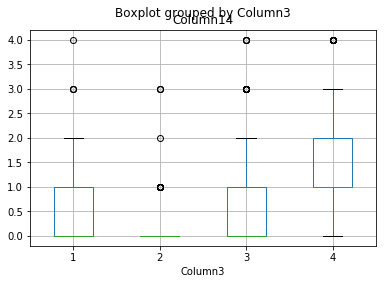

In [9]:
# Create a boxplot of heart diseases diagnosis per chest-pain type
heart_disease['train'].boxplot('Column14', 'Column3')

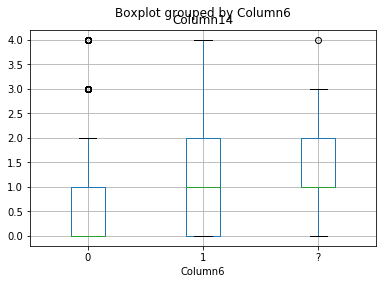

In [10]:
# Create a boxplot of heart diseases diagnosis per fasting blood sugar > 120 mg/dl
heart_disease['train'].boxplot('Column14', 'Column6')

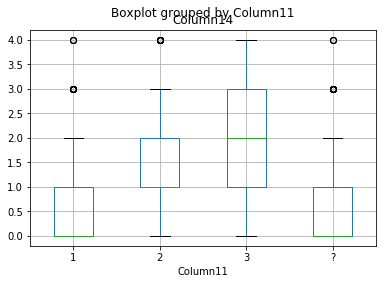

In [11]:
# Create a boxplot of heart diseases diagnosis per peak exercise ST segment
heart_disease['train'].boxplot('Column14', 'Column11')

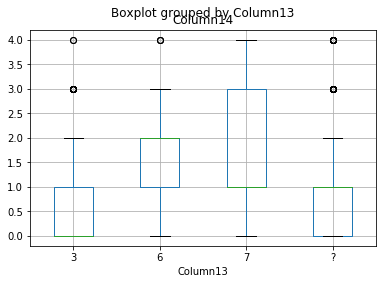

In [12]:
# Create a boxplot of heart diseases diagnosis per thal
heart_disease['train'].boxplot('Column14', 'Column13')

In [13]:
heart_disease['train'].loc[heart_disease['train']['Column3'] == 1, 'Column3'] = 'typical_agina'
heart_disease['train'].loc[heart_disease['train']['Column3'] == 2, 'Column3'] = 'atypical_agina'
heart_disease['train'].loc[heart_disease['train']['Column3'] == 3, 'Column3'] = 'non_aginal_pain'
heart_disease['train'].loc[heart_disease['train']['Column3'] == 4, 'Column3'] = 'asymtotic'

heart_disease['train'].loc[heart_disease['train']['Column7'] == '0', 'Column7'] = 'normal'
heart_disease['train'].loc[heart_disease['train']['Column7'] == '1', 'Column7'] = 'having ST-T wave abnormality'
heart_disease['train'].loc[heart_disease['train']['Column7'] == '2', 'Column7'] = 'left ventricular hyperthrophy'

heart_disease['train'].loc[heart_disease['train']['Column11'] == '1', 'Column11'] = 'upsloping'
heart_disease['train'].loc[heart_disease['train']['Column11'] == '2', 'Column11'] = 'flat'
heart_disease['train'].loc[heart_disease['train']['Column11'] == '3', 'Column11'] = 'downsloping'

heart_disease['train'].loc[heart_disease['train']['Column13'] == '3', 'Column13'] = 'normal'
heart_disease['train'].loc[heart_disease['train']['Column13'] == '6', 'Column13'] = 'fixed_defect'
heart_disease['train'].loc[heart_disease['train']['Column13'] == '7', 'Column13'] = 'reversable_defect'

In [14]:
heart_disease['train'].Column4 = pd.to_numeric(heart_disease['train'].Column4, errors='coerce')
heart_disease['train'].Column5 = pd.to_numeric(heart_disease['train'].Column5, errors='coerce')
heart_disease['train'].Column6 = pd.to_numeric(heart_disease['train'].Column6, errors='coerce')
heart_disease['train'].Column8 = pd.to_numeric(heart_disease['train'].Column8, errors='coerce')
heart_disease['train'].Column9 = pd.to_numeric(heart_disease['train'].Column9, errors='coerce')
heart_disease['train'].Column10 = pd.to_numeric(heart_disease['train'].Column10, errors='coerce')
heart_disease['train'].Column12 = pd.to_numeric(heart_disease['train'].Column12, errors='coerce')

In [16]:
df = pd.get_dummies(heart_disease['train'])
df.columns

Index(['Column1', 'Column2', 'Column4', 'Column5', 'Column6', 'Column8',
       'Column9', 'Column10', 'Column12', 'Column14', 'Column3_asymtotic',
       'Column3_atypical_agina', 'Column3_non_aginal_pain',
       'Column3_typical_agina', 'Column7_?',
       'Column7_having ST-T wave abnormality',
       'Column7_left ventricular hyperthrophy', 'Column7_normal', 'Column11_?',
       'Column11_downsloping', 'Column11_flat', 'Column11_upsloping',
       'Column13_?', 'Column13_fixed_defect', 'Column13_normal',
       'Column13_reversable_defect'],
      dtype='object')

## Experiment